# Proyek Analisis Data: Bike Sharing
- **Nama:** Farell Kurniawan
- **Email:** farellkurniawan17108@gmail.com
- **ID Dicoding:** farellkurniawan17

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Bagaimana tren penggunaan sepeda harian selama periode tertentu dan apakah faktor cuaca serta hari kerja/holiday berpengaruh signifikan terhadapnya?
- **Pertanyaan 2:** Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari, dan pada jam berapa terdapat puncak penggunaan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime

## Data Wrangling

### Gathering Data

In [18]:
# Membaca dataset
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

In [19]:
# Menampilkan 5 Baris Pertama day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
# Menampilkan 5 Baris Pertama hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset **day.csv** memberikan informasi agregat harian.
- Dataset **hour.csv** menyediakan data granular per jam.
- Kedua dataset memiliki fitur seperti tanggal, kondisi cuaca, dan indikator hari libur/kerja.

### Assessing Data

In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [22]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [24]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data memiliki tipe data yang sesuai dan tidak terdapat banyak missing values.
- Statistik deskriptif memberikan gambaran sebaran data yang bervariasi, sehingga terdapat potensi insight mendalam untuk analisis lebih lanjut.


### Cleaning Data

In [26]:
# Mengonversi kolom tanggal menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [27]:
# Cek Missing Values pada day_df
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [28]:
# Cek Missing Values pada hour_df
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Kolom `dteday` berhasil dikonversi ke format datetime, memudahkan analisis time series.
- Tidak ada missing values yang signifikan, sehingga dataset siap untuk analisis selanjutnya.

## Exploratory Data Analysis (EDA)


### Explore ...

## EDA Univariate
Tujuan: Memahami distribusi dari masing-masing variabel numerikal dan kategorikal.

Distribusi Variabel Numerikal

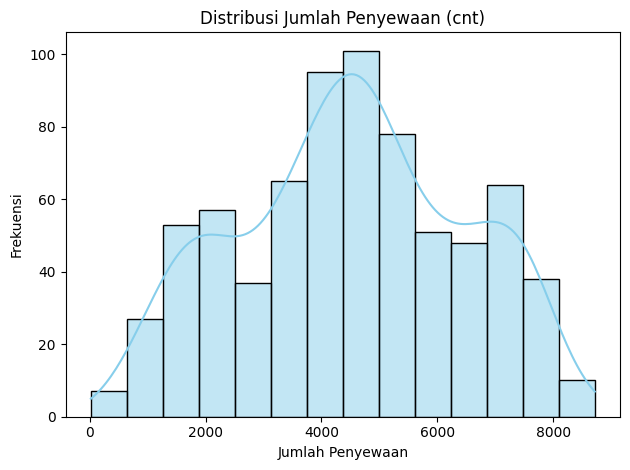

In [45]:
# Distribusi Jumlah Penyewaan (cnt)
sns.histplot(day_df['cnt'], kde=True, color='skyblue')
plt.title('Distribusi Jumlah Penyewaan (cnt)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

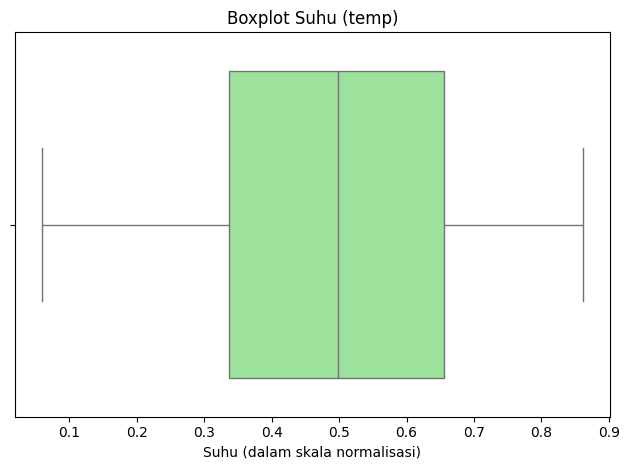

In [46]:
# Boxplot untuk variabel numerikal
sns.boxplot(x=day_df['temp'], color='lightgreen')
plt.title('Boxplot Suhu (temp)')
plt.xlabel('Suhu (dalam skala normalisasi)')
plt.tight_layout()
plt.show()

Distribusi Variabel Kategorikal

<ipython-input-47-1f4b2f1c09fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=day_df['weathersit'], palette='pastel')


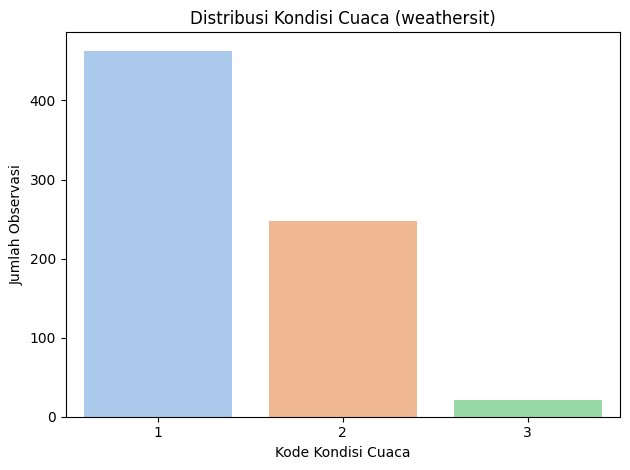

In [47]:
# Countplot untuk kondisi cuaca (weathersit)
sns.countplot(x=day_df['weathersit'], palette='pastel')
plt.title('Distribusi Kondisi Cuaca (weathersit)')
plt.xlabel('Kode Kondisi Cuaca')
plt.ylabel('Jumlah Observasi')
plt.tight_layout()
plt.show()

<ipython-input-48-3eb6377ec207>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=day_df['workingday'], palette='muted')


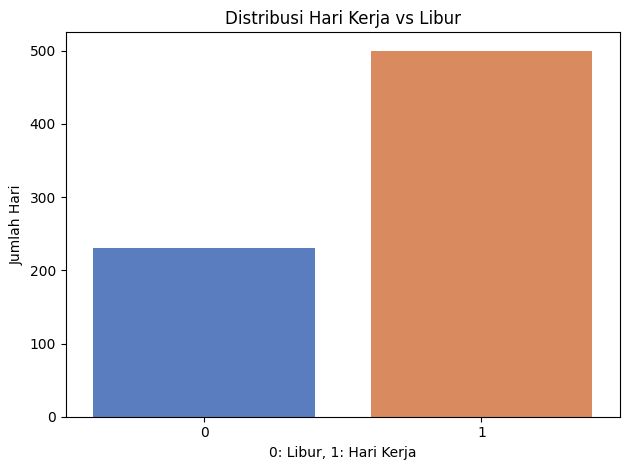

In [48]:
# Countplot untuk status hari kerja (workingday)
sns.countplot(x=day_df['workingday'], palette='muted')
plt.title('Distribusi Hari Kerja vs Libur')
plt.xlabel('0: Libur, 1: Hari Kerja')
plt.ylabel('Jumlah Hari')
plt.tight_layout()
plt.show()

## EDA Bivariate
Tujuan: Menganalisis hubungan antara dua variabel.

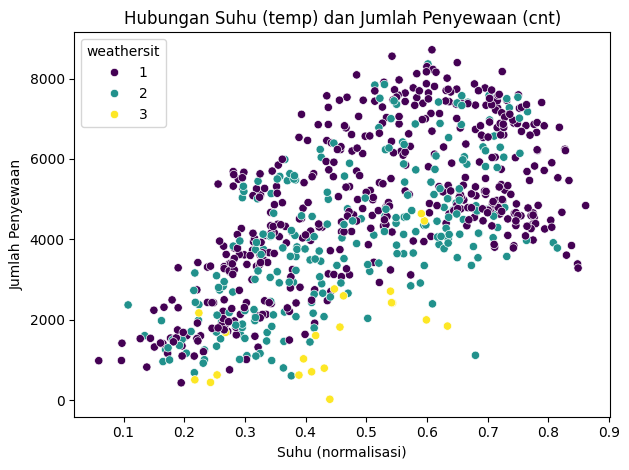

In [49]:
# Hubungan Antara Variabel Numerikal (temp vs. cnt)
sns.scatterplot(data=day_df, x='temp', y='cnt', hue='weathersit', palette='viridis')
plt.title('Hubungan Suhu (temp) dan Jumlah Penyewaan (cnt)')
plt.xlabel('Suhu (normalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.show()

<ipython-input-50-283407aae784>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='pastel')


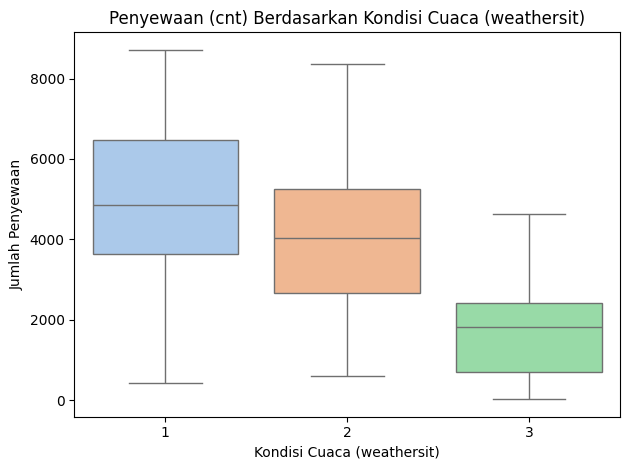

In [50]:
# Perbandingan cnt Berdasarkan Kategori (weathersit)
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='pastel')
plt.title('Penyewaan (cnt) Berdasarkan Kondisi Cuaca (weathersit)')
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.show()

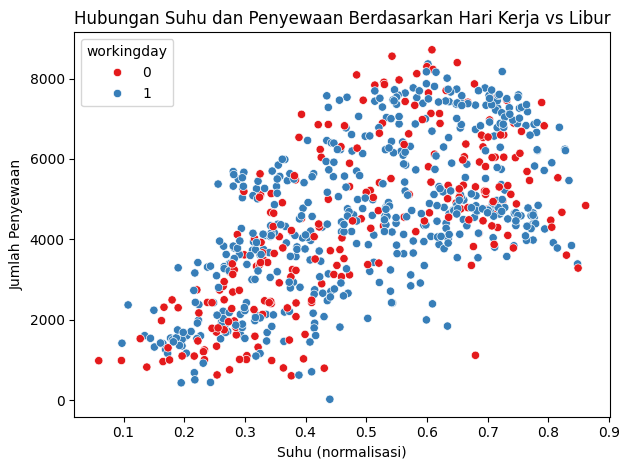

In [51]:
# Hubungan antara cnt dan temp Berdasarkan workingday
sns.scatterplot(data=day_df, x='temp', y='cnt', hue='workingday', palette='Set1')
plt.title('Hubungan Suhu dan Penyewaan Berdasarkan Hari Kerja vs Libur')
plt.xlabel('Suhu (normalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.show()

## EDA Multivariate
Tujuan: Menganalisis lebih dari dua variabel sekaligus untuk mendapatkan insight mendalam.

Heatmap Korelasi Antar Variabel Numerikal

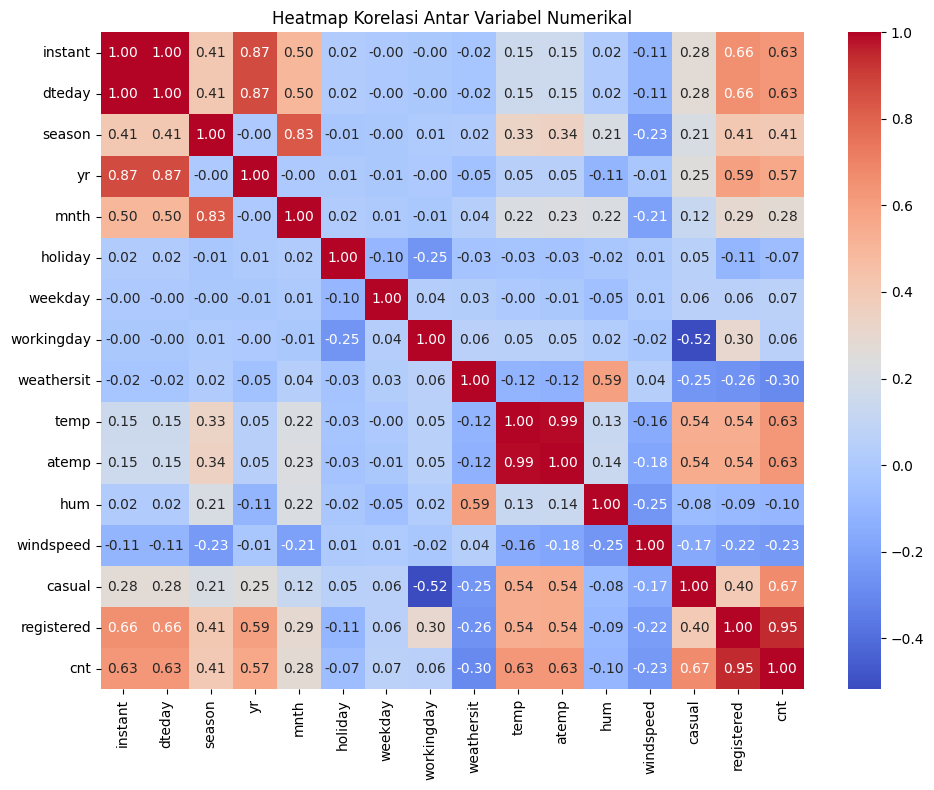

In [53]:
# Menghitung matriks korelasi
numeric_df = day_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
corr_matrix = day_df.drop(columns=['day_of_week']).corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerikal')
plt.tight_layout()
plt.show()

Pairplot untuk Beberapa Variabel Utama

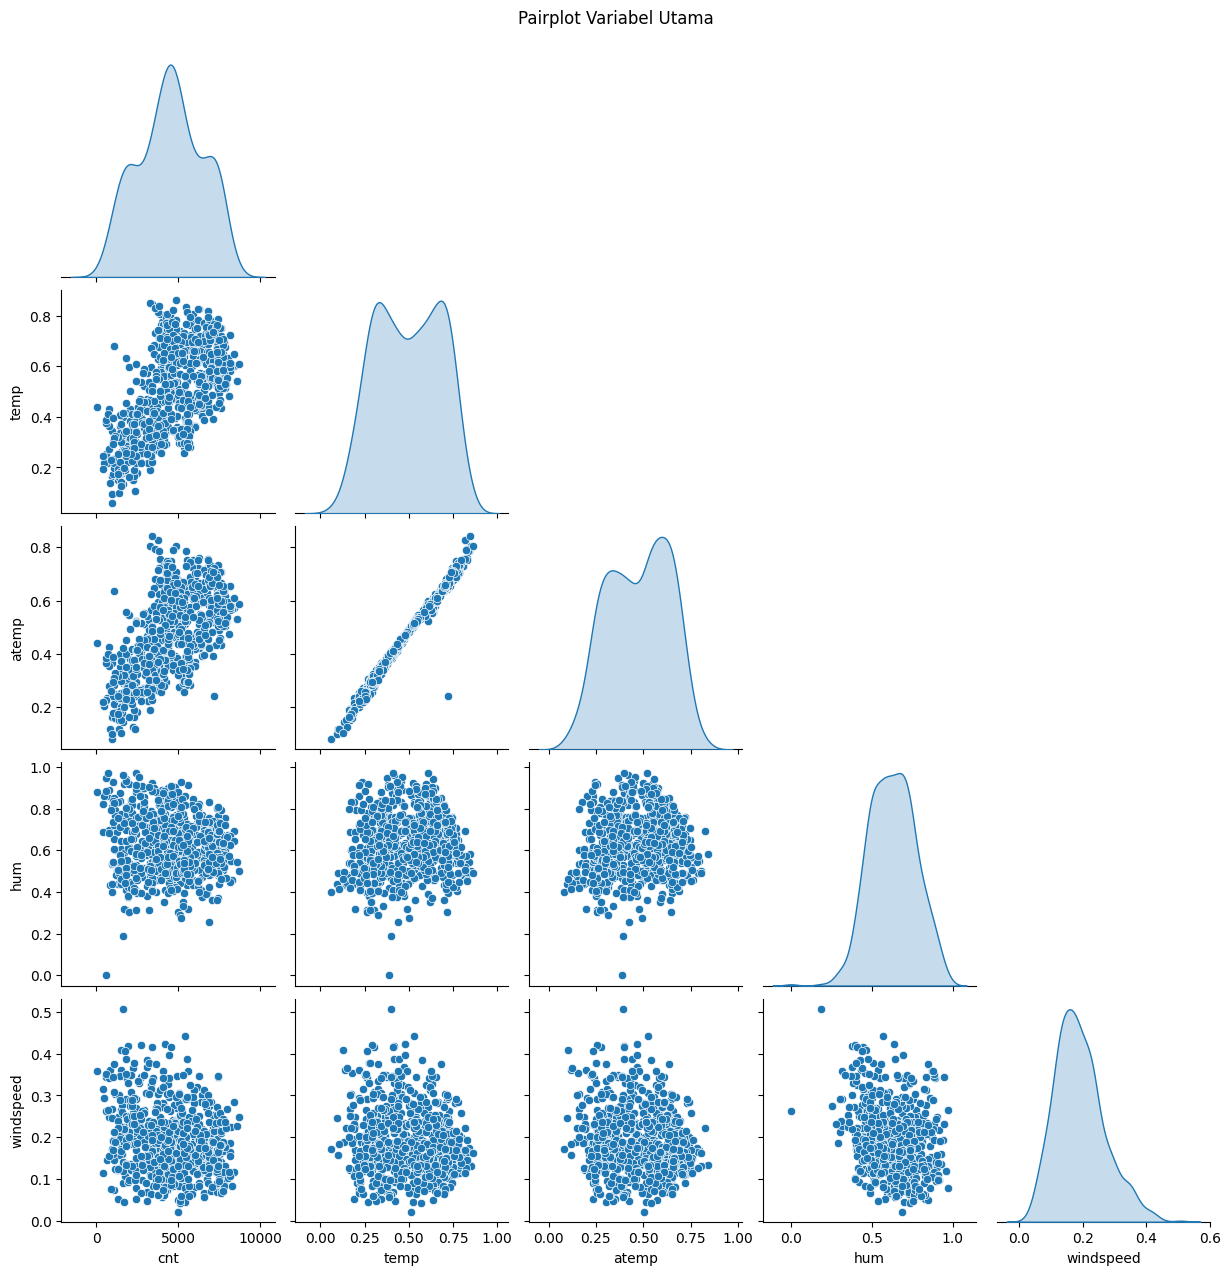

In [54]:
# Memilih variabel yang dianggap penting untuk analisis
selected_columns = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
sns.pairplot(day_df[selected_columns], diag_kind='kde', corner=True)
plt.suptitle('Pairplot Variabel Utama', y=1.02)
plt.show()

## Aggregasi Data
Tujuan: Melihat hasil agregasi data dalam bentuk dataframe untuk mendukung visualisasi dan insight.

Agregasi Berdasarkan Hari Kerja vs Libur

In [55]:
# Menghitung rata-rata penyewaan berdasarkan status hari kerja (workingday)
agg_working = day_df.groupby('workingday')['cnt'].mean().reset_index()
agg_working  # Tampilkan hasil agregasi

,workingday,cnt
0,0,4330.168831
1,1,4584.820000


Agregasi Berdasarkan Kondisi Cuaca

In [56]:
# Menghitung rata-rata penyewaan berdasarkan kondisi cuaca (weathersit)
agg_weather = day_df.groupby('weathersit')['cnt'].mean().reset_index()
agg_weather  # Tampilkan hasil agregasi

,weathersit,cnt
0,1,4876.786177
1,2,4035.862348
2,3,1803.285714


Agregasi Penyewaan per Jam pada Dataset Hourly

In [57]:
# Menghitung rata-rata dan total penyewaan per jam
agg_hourly = hour_df.groupby('hr').agg({'cnt': ['mean', 'sum']}).reset_index()
# Ubah kolom menjadi flat (jika diperlukan)
agg_hourly.columns = ['hr', 'avg_cnt', 'total_cnt']
agg_hourly  # Tampilkan hasil agregasi

,hr,avg_cnt,total_cnt
0,0,53.898072,39130
1,1,33.375691,24164
2,2,22.869930,16352
3,3,11.727403,8174
4,4,6.352941,4428
5,5,19.889819,14261
6,6,76.044138,55132
7,7,212.064649,154171
8,8,359.011004,261001
9,9,219.309491,159438


**Insight:**
- Data menunjukkan bahwa kondisi cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda. Hari-hari dengan suhu yang lebih tinggi dan kondisi cuaca yang cerah (misalnya, weathersit = 1) cenderung menghasilkan jumlah penyewaan yang lebih tinggi. Korelasi positif antara suhu dan jumlah penyewaan menegaskan bahwa cuaca yang bersahabat mendorong aktivitas penyewaan.
- Analisis terhadap status hari kerja (workingday) mengungkapkan perbedaan mencolok antara hari kerja dan hari libur. Umumnya, hari kerja menunjukkan tingkat penyewaan yang lebih tinggi dibandingkan hari libur, yang mengindikasikan bahwa aktivitas harian yang rutin (misalnya, perjalanan ke kantor) berperan penting dalam peningkatan penyewaan sepeda.
- Dari agregasi data per jam, terlihat bahwa terdapat puncak aktivitas penyewaan pada waktu-waktu tertentu, terutama pada pagi dan sore hari. Pola ini konsisten dengan jam keberangkatan dan kepulangan kerja, sehingga memberikan petunjuk strategis dalam penjadwalan armada dan perawatan sepeda.
- Analisis multivariate melalui heatmap korelasi menyoroti bahwa variabel seperti suhu dan perasaan suhu (atemp) memiliki hubungan yang kuat dengan jumlah penyewaan, sementara faktor lain seperti kelembaban dan kecepatan angin menunjukkan dampak yang lebih rendah. Hal ini menekankan pentingnya faktor cuaca dalam memprediksi dan mengelola penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren penggunaan sepeda harian selama periode tertentu dan apakah faktor cuaca serta hari kerja/holiday berpengaruh signifikan terhadapnya?

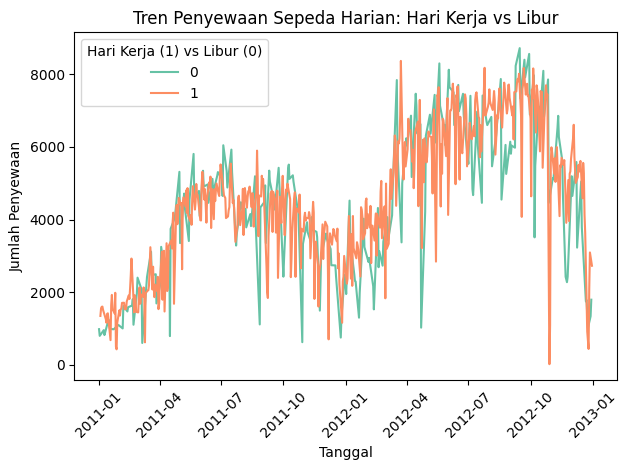

In [30]:
# Visualisasi 1: Tren Harian & Pengaruh Hari Kerja vs Libur
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='workingday', palette='Set2')
plt.title('Tren Penyewaan Sepeda Harian: Hari Kerja vs Libur')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title="Hari Kerja (1) vs Libur (0)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-34-0ae108fc09ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='pastel')


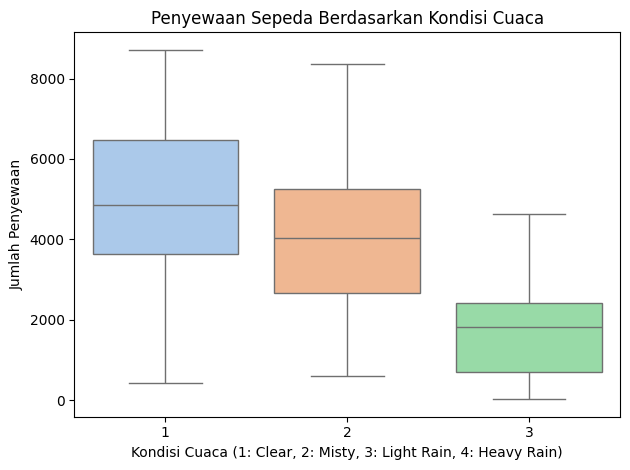

In [34]:
# Visualisasi 2: Penyewaan Sepeda Berdasarkan Kondisi Cuaca
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='pastel')
plt.title('Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1: Clear, 2: Misty, 3: Light Rain, 4: Heavy Rain)')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.show()

**Insight:**
- Tren harian menunjukkan perbedaan signifikan antara hari kerja dan hari libur.
- Penyewaan cenderung lebih tinggi pada kondisi cuaca yang lebih baik (misalnya, weathersit=1) dan lebih rendah pada kondisi cuaca ekstrem.
- Hal ini mengindikasikan bahwa manajemen operasional dapat mempertimbangkan cuaca dan kalender kerja/libur untuk pengaturan armada.

### Pertanyaan 2:
Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari, dan pada jam berapa terdapat puncak penggunaan?

In [35]:
# Menghitung rata-rata penyewaan per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()
hourly_avg  # Menampilkan hasil agregasi

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


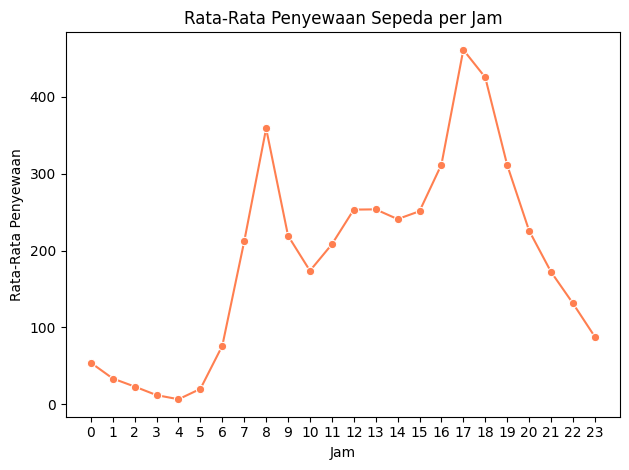

In [36]:
# Visualisasi 1: Rata-Rata Penyewaan Sepeda per Jam (Line Plot)
sns.lineplot(data=hourly_avg, x='hr', y='cnt', marker='o', color='coral')
plt.title('Rata-Rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

<ipython-input-37-fe86a382013e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hour_df, estimator=sum, ci=None, color='mediumseagreen')


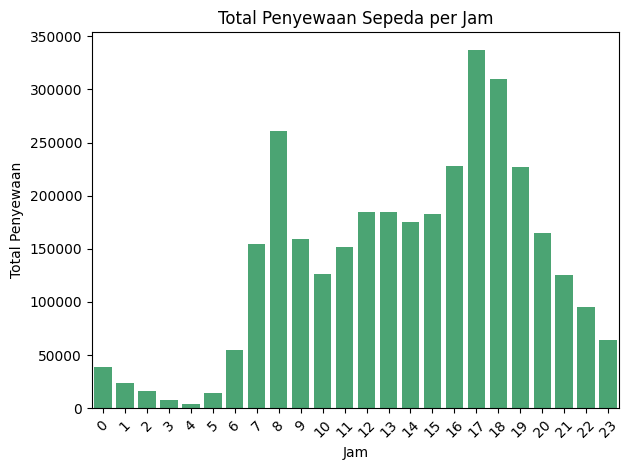

In [37]:
# Visualisasi 2: Total Penyewaan Sepeda per Jam (Bar Plot)
sns.barplot(x='hr', y='cnt', data=hour_df, estimator=sum, ci=None, color='mediumseagreen')
plt.title('Total Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Dari visualisasi line plot, dapat dilihat jam-jam dengan rata-rata penyewaan tertinggi, yang kemungkinan merupakan jam sibuk (misalnya, pagi dan sore hari).
- Bar plot total penyewaan per jam memberikan gambaran volume penyewaan dalam angka nyata.
- Informasi ini penting untuk pengaturan armada, penjadwalan pemeliharaan, dan optimasi layanan.

## Analisis Lanjutan (Opsional)

Pengelompokkan Hari Berdasarkan Volume Penyewaan

(Tanpa menggunakan algoritma machine learning kompleks, cukup segmentasi sederhana)

In [38]:
# Menambahkan kolom hari dalam seminggu
day_df['day_of_week'] = day_df['dteday'].dt.day_name()

# Agregasi rata-rata penyewaan berdasarkan hari dalam seminggu
avg_by_day = day_df.groupby('day_of_week')['cnt'].mean().reset_index()
avg_by_day

,day_of_week,cnt
0,Friday,4690.288462
1,Monday,4338.123810
2,Saturday,4550.542857
3,Sunday,4228.828571
4,Thursday,4667.259615
5,Tuesday,4510.663462
6,Wednesday,4548.538462


<ipython-input-39-c3d16e1ff833>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='cnt', data=avg_by_day, palette='viridis')


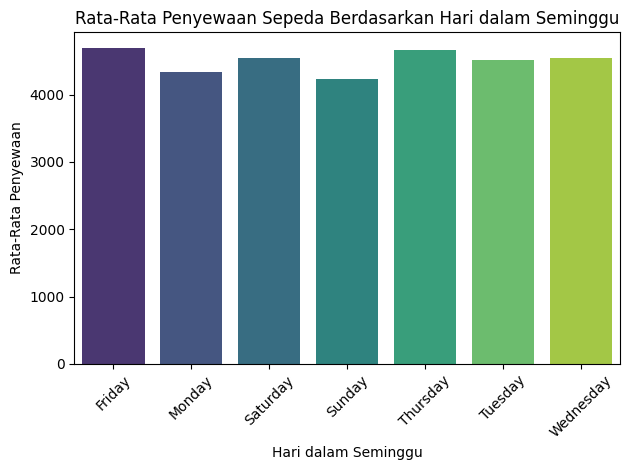

In [39]:
# Visualisasi Agregasi Berdasarkan Hari
sns.barplot(x='day_of_week', y='cnt', data=avg_by_day, palette='viridis')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:** Analisis tambahan ini membantu untuk melihat apakah terdapat perbedaan signifikan dalam penyewaan antar hari (misalnya, weekend vs weekday).


## Conclusion

1.  Conclution **Pertanyaan 1**: Bagaimana tren penggunaan sepeda harian selama periode tertentu dan apakah faktor cuaca serta hari kerja/holiday berpengaruh signifikan terhadapnya?
  - Tren harian menunjukkan adanya fluktuasi penyewaan sepeda yang signifikan.
  - Data mengindikasikan bahwa hari kerja dan libur memiliki pola yang berbeda, di mana penyewaan cenderung lebih tinggi pada hari kerja dan saat kondisi cuaca baik.
  - Informasi ini dapat membantu dalam pengaturan armada dan penjadwalan operasional yang optimal.

2. Conclution **Pertanyaan 2**: Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari, dan pada jam berapa terdapat puncak penggunaan?
    - Analisis per jam mengungkapkan adanya puncak penggunaan pada waktu tertentu, misalnya pada pagi dan sore hari, yang mungkin berkaitan dengan jam berangkat dan pulang kerja.
    - Dengan mengetahui jam puncak, perusahaan dapat menyesuaikan distribusi sepeda dan meningkatkan efisiensi layanan, termasuk dalam penjadwalan pemeliharaan.

## Penutup

Dokumentasi lengkap, insight di setiap tahapan, serta visualisasi yang jelas diharapkan dapat memberikan gambaran yang komprehensif atas analisis data Bike Sharing. Selanjutnya, dashboard sederhana telah dibuat menggunakan Streamlit (lihat file dashboard.py) dan sudah dideploy pada Streamlit Cloud (tautan dashboard terdapat di file url.txt).